In [1]:
import pandas as pd
import numpy as np
from pandas.io.html import read_html
page = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

<h2>1. Scraping the Wikipedia page to get the postal codes of Canada

In [2]:
tables_from_page = read_html(page, attrs = {'class':'wikitable'})
# The table will be in "tables_from_page" as an array. If there were more than one table in the page 
# they will be under the coreresponding index in the array
# Because it is only one. It is in the index 0.

To get the class name(wikitable):
Right click on webpage (better over the table), Click on "Inspect" option, then look for "Table class=" on inspect window.

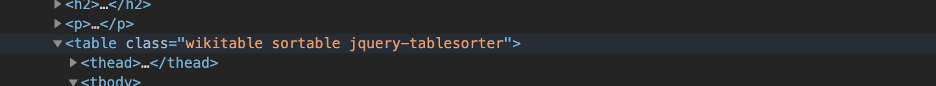

In [3]:
# When the table it is assigned, the final format is a dataframe
df = tables_from_page[0]
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [4]:
# Clean up the dataframe from all Borough equals "Not assigned"  
df=df[df['Borough']!='Not assigned']
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


<h3> The table extracted comes with neighborhoods already combined into one row, so, I separated them to make the instruction about combining the neighborhoods makes sense.

In [5]:
# df['Neighborhood'].str.split(', ',expand=True) # Create one column for every combined neighborhood in the row and
# let it know how many columns should be add to the dataframe 

# After knowing how many columns should be add, the originale dataframe should be reestablished and
# then to add the columns with separated neighborhoods on each.
df[['Ne0','Ne1','Ne2','Ne3','Ne4','Ne5','Ne6','Ne7']] = df['Neighbourhood'].str.split(', ',expand=True)

# Transpose columns to rows.  
df = df.set_index(['Postal Code','Borough']).stack().reset_index()

# Transpose creates a column called "level_2" with the name of columns (this is the stacker columns),
#and a column 0 with the name of neighborhoods rename both columns
df.rename(columns={'Postal Code':'PostalCode',0:'Neighborhoods'},inplace=True)

# Drop rows with original neighborhoods combined, because they already are separated.  
df = df.drop(index=df[df['level_2'] == 'Neighbourhood'].index)

# Drop the columns with columns names. Only the column with neighborhoods names is useful. 
df.drop(columns='level_2',inplace=True)

# Dataframe with neighborhoods separated
df.head()

,PostalCode,Borough,Neighborhoods
1,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Regent Park
6,M5A,Downtown Toronto,Harbourfront
8,M6A,North York,Lawrence Manor


In [6]:
# Grouping neighbourhoods with same PostalCode
df = df.groupby(['PostalCode','Borough'], sort=False).agg(', '.join)
df.reset_index(inplace=True)
print(df.shape)
df.head()

(103, 3)


,PostalCode,Borough,Neighborhoods
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
df.shape

(103, 3)